In [8]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)


Training Logistic Regression model...
Logistic Regression Accuracy: 0.9653
--------------------------------------------------
Training Decision Tree model...
Decision Tree Accuracy: 0.9429
--------------------------------------------------
Training Random Forest model...
Random Forest Accuracy: 0.9608
--------------------------------------------------
Training SVM model...
SVM Accuracy: 0.9630
--------------------------------------------------
Training XGBoost model...


c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:22:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9653
--------------------------------------------------
Training LightGBM model...
[LightGBM] [Info] Number of positive: 2017, number of negative: 1554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 3571, number of used features: 252
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.564828 -> initscore=0.260779
[LightGBM] [Info] Start training from score 0.260779
LightGBM Accuracy: 0.9630
--------------------------------------------------


C:\Users\prane\AppData\Local\Temp\ipykernel_12828\4107869363.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


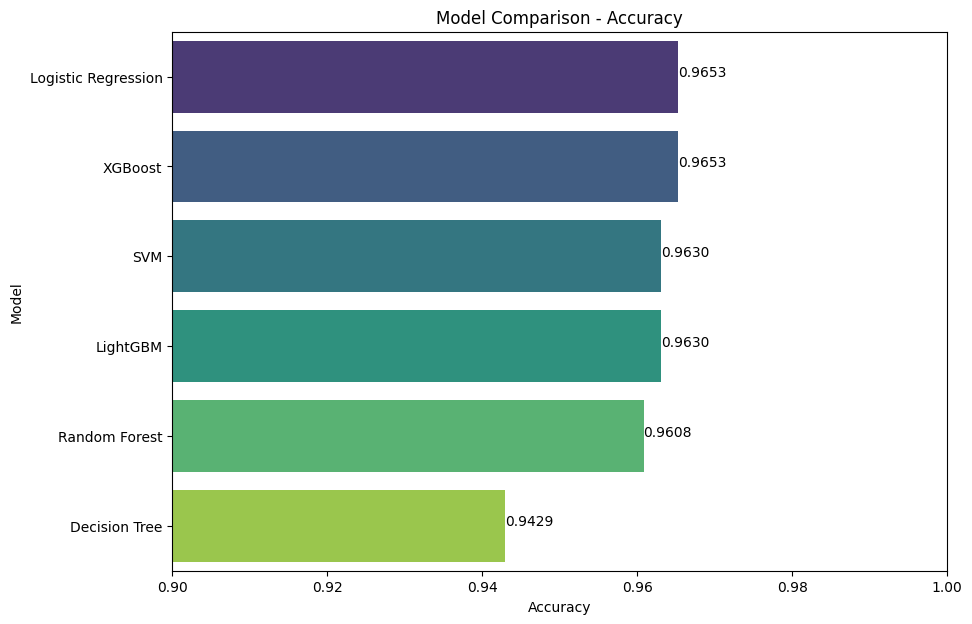


--- Model Performance Summary ---
                 Model  Accuracy
0  Logistic Regression  0.965286
4              XGBoost  0.965286
3                  SVM  0.963046
5             LightGBM  0.963046
2        Random Forest  0.960806
1        Decision Tree  0.942889


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Load and Prepare the Data ---

# Load the dataset from the CSV file
df = pd.read_csv('Android_Malware_Benign.csv')

# Drop rows with missing labels, if any
df.dropna(subset=['Label'], inplace=True)

# Separate the features (X) from the target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Encode the categorical 'Label' column into numerical format (0 and 1)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Train and Evaluate Models ---

# Create a dictionary to store the model results for later comparison
results = {}

# --- Model 1: Logistic Regression ---
print("Training Logistic Regression model...")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
results['Logistic Regression'] = accuracy_lr
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("-" * 50)

# --- Model 2: Decision Tree ---
print("Training Decision Tree model...")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
results['Decision Tree'] = accuracy_dt
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("-" * 50)

# --- Model 3: Random Forest ---
print("Training Random Forest model...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = accuracy_rf
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("-" * 50)

# --- Model 4: Support Vector Machine (SVM) ---
print("Training SVM model...")
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
results['SVM'] = accuracy_svm
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("-" * 50)

# --- Model 5: XGBoost ---
print("Training XGBoost model...")
# The `use_label_encoder` argument is deprecated, so we set it to False.
# `eval_metric` is set to 'logloss' to avoid a warning message.
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
results['XGBoost'] = accuracy_xgb
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("-" * 50)

# --- Model 6: LightGBM ---
print("Training LightGBM model...")
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
results['LightGBM'] = accuracy_lgb
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print("-" * 50)


# --- 3. Compare Model Performance ---

# Convert the results dictionary to a pandas DataFrame for easy plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

# Create a bar plot to visualize the accuracies
plt.figure(figsize=(10, 7))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison - Accuracy')
plt.xlim(0.9, 1.0) # Adjust the x-axis for better readability

# Add the accuracy values on the bars
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value, index, f'{value:.4f}')

# Display the plot
plt.show()

# Print the final summary table
print("\n--- Model Performance Summary ---")
print(results_df)

Dataset shape: (4464, 328)

First few rows:
   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                     0                        0                          0   
1                     0                        0                          0   
2                     0                        0                          0   
3                     0                        0                          0   
4                     0                        0                          0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                       0                      0                     0   
1                       0                      0                     0   
2                       0                      0                     0   
3                       0                      0                     0   
4                       0                      0                     0   

   ACCESS_LOCATION_EXTRA_COMMANDS  A

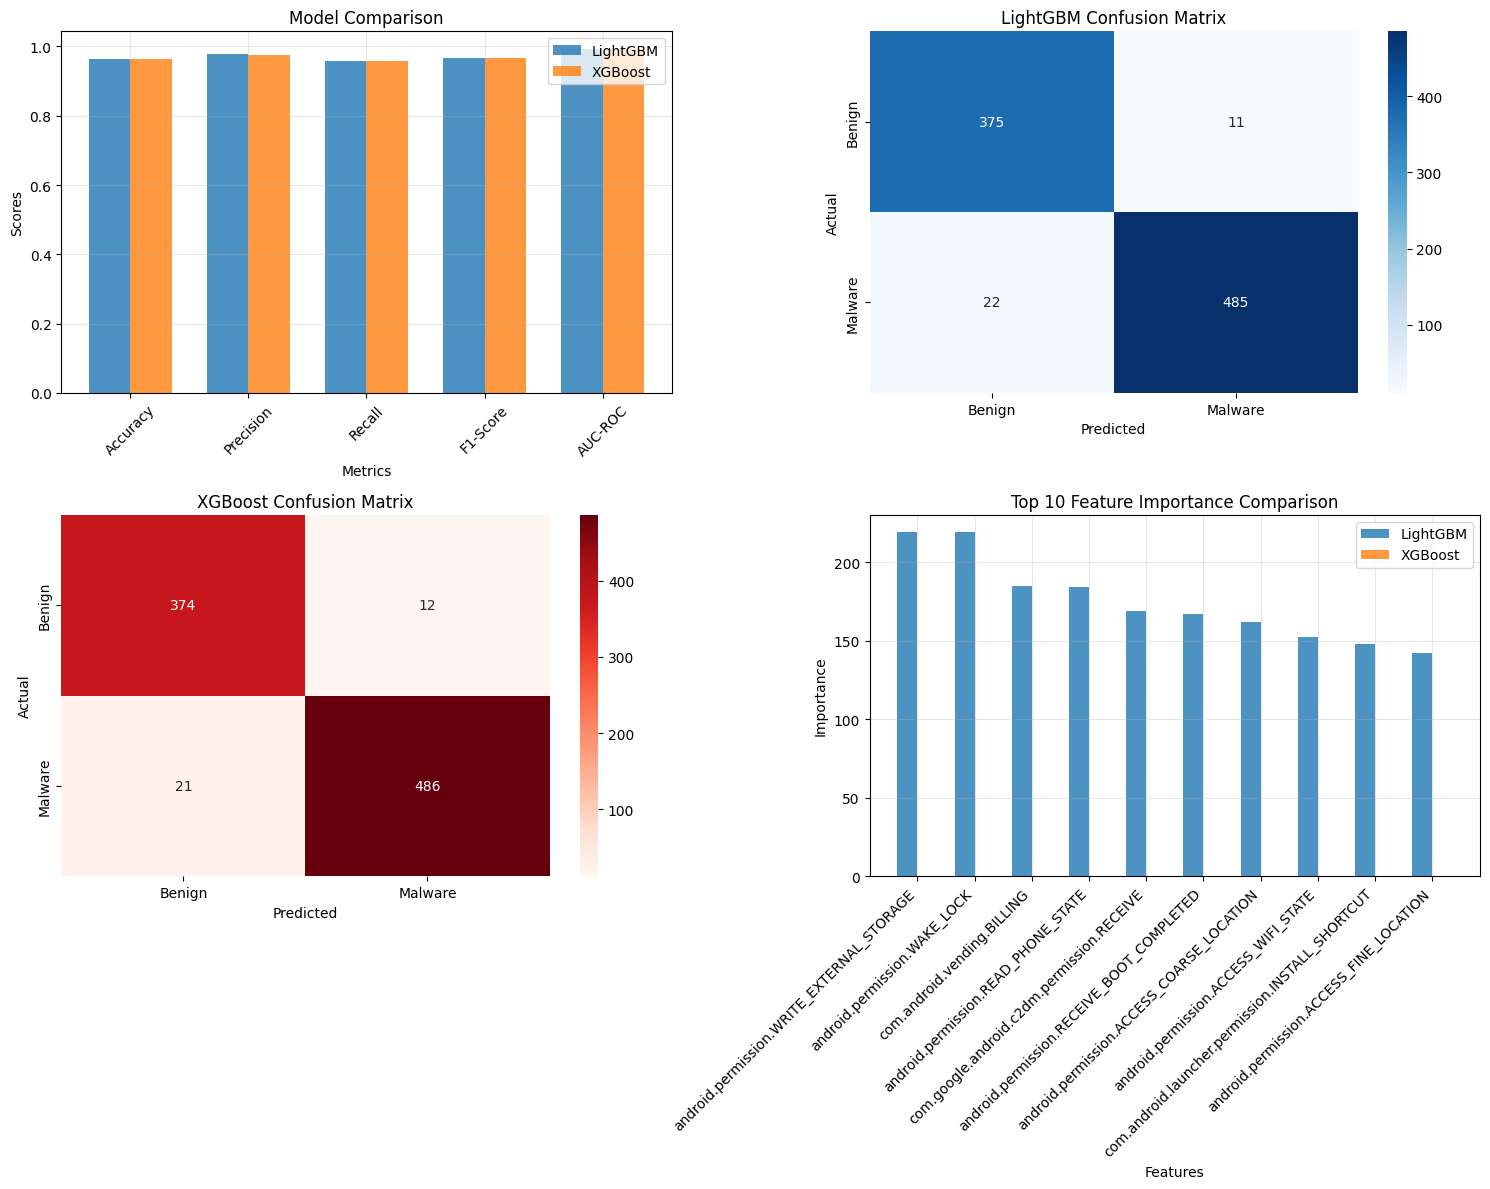


FINAL MODEL COMPARISON
        Metric  LightGBM  XGBoost
0     Accuracy    0.9630   0.9630
1    Precision    0.9778   0.9759
2       Recall    0.9566   0.9586
3     F1-Score    0.9671   0.9672
4      AUC-ROC    0.9940   0.9937
5  CV Accuracy    0.9513   0.9555

Best Model: XGBoost (F1-Score: 0.9672)
XGBoost model saved as 'best_malware_detection_model.json'

Model training and evaluation completed successfully!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_classif
import joblib # Import joblib
import warnings
warnings.filterwarnings('ignore')

# --- 1. Load and Prepare Data ---
df = pd.read_csv('Android_Malware_Benign.csv')
X = df.drop('Label', axis=1)
y = df['Label']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data (stratify is important for imbalanced datasets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- 2. Feature Selection ---
# Select the top 100 most informative features
print("Performing feature selection...")
selector = SelectKBest(score_func=f_classif, k=100)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
print(f"Data shape after feature selection: {X_train_selected.shape}")


# --- 3. Train Models (LightGBM and XGBoost) ---
# LightGBM Model
print("\nTraining LightGBM model...")
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_selected, y_train)
lgb_pred = lgb_model.predict(X_test_selected)
lgb_f1 = f1_score(y_test, lgb_pred)
print(f"LightGBM F1-Score: {lgb_f1:.4f}")

# XGBoost Model
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)
xgb_pred = xgb_model.predict(X_test_selected)
xgb_f1 = f1_score(y_test, xgb_pred)
print(f"XGBoost F1-Score: {xgb_f1:.4f}")


# --- 4. Determine and Save the Best Model ---
if lgb_f1 > xgb_f1:
    best_model_name = 'LightGBM'
    best_model = lgb_model
    print(f"\nBest Model: LightGBM (F1-Score: {lgb_f1:.4f})")
else:
    best_model_name = 'XGBoost'
    best_model = xgb_model
    print(f"\nBest Model: XGBoost (F1-Score: {xgb_f1:.4f})")

# Save the best model and the preprocessors using joblib
joblib.dump(best_model, 'best_malware_model.joblib')
joblib.dump(selector, 'feature_selector.joblib')
joblib.dump(le, 'label_encoder.joblib')
print(f"\n{best_model_name} model and preprocessors saved successfully using joblib!")


# --- 5. Load Model and Test with New Input ---
print("\n" + "="*50)
print("LOADING MODEL AND TESTING WITH NEW INPUT")
print("="*50)

# Load the saved model and preprocessors
loaded_model = joblib.load('best_malware_model.joblib')
loaded_selector = joblib.load('feature_selector.joblib')
loaded_encoder = joblib.load('label_encoder.joblib')

print("Model and preprocessors loaded successfully!")

# EXAMPLE INPUT:
# This must be a list or NumPy array with the original 330 feature values (0s or 1s).
# This example is the first row of your dataset, which is known 'Malware'.
sample_input = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]

# 1. Convert to a NumPy array for processing
input_array = np.array(sample_input).reshape(1, -1)

# 2. Apply the SAME feature selection
input_selected = loaded_selector.transform(input_array)

# 3. Make the prediction
prediction_encoded = loaded_model.predict(input_selected)

# 4. Decode the prediction to get the original label
prediction_label = loaded_encoder.inverse_transform(prediction_encoded)

# --- 6. Display the Final Result ---
print("\n--- Prediction Result ---")
print(f"The model predicts that the application is: **{prediction_label[0]}**")
print("-------------------------")

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import warnings
warnings.filterwarnings('ignore')

# --- 1. Load and Prepare Data ---
df = pd.read_csv('Android_Malware_Benign.csv')

# Handle potential parsing issues that might create unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.dropna(inplace=True)

X = df.drop('Label', axis=1)
y = df['Label']

# Store the feature names for later
feature_names = X.columns

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- 2. Feature Selection ---
print("Performing feature selection...")
# We use the original DataFrame column count to ensure consistency
selector = SelectKBest(score_func=f_classif, k=100)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
print(f"Original feature count: {X_train.shape[1]}")
print(f"Data shape after feature selection: {X_train_selected.shape}")


# --- 3. Train Models (LightGBM and XGBoost) ---
print("\nTraining LightGBM model...")
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_selected, y_train)
lgb_pred = lgb_model.predict(X_test_selected)
lgb_f1 = f1_score(y_test, lgb_pred)
print(f"LightGBM F1-Score: {lgb_f1:.4f}")

print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)
xgb_pred = xgb_model.predict(X_test_selected)
xgb_f1 = f1_score(y_test, xgb_pred)
print(f"XGBoost F1-Score: {xgb_f1:.4f}")


# --- 4. Determine and Save the Best Model ---
if lgb_f1 > xgb_f1:
    best_model_name = 'LightGBM'
    best_model = lgb_model
    print(f"\nBest Model: LightGBM (F1-Score: {lgb_f1:.4f})")
else:
    best_model_name = 'XGBoost'
    best_model = xgb_model
    print(f"\nBest Model: XGBoost (F1-Score: {xgb_f1:.4f})")

joblib.dump(best_model, 'best_malware_model.joblib')
joblib.dump(selector, 'feature_selector.joblib')
joblib.dump(le, 'label_encoder.joblib')
joblib.dump(feature_names, 'feature_names.joblib') # Save the column names
print(f"\n{best_model_name} model and preprocessors saved successfully!")


# --- 5. Load Model and Test with New Input ---
print("\n" + "="*50)
print("LOADING MODEL AND TESTING WITH NEW INPUT")
print("="*50)

# Load the saved model and preprocessors
loaded_model = joblib.load('best_malware_model.joblib')
loaded_selector = joblib.load('feature_selector.joblib')
loaded_encoder = joblib.load('label_encoder.joblib')
loaded_features = joblib.load('feature_names.joblib')

print("Model and preprocessors loaded successfully!")

# To test with a new input, you must provide a list or array with the same
# number of features the model was trained on.
# Number of features expected: len(loaded_features)

# EXAMPLE: Let's use the first row from the original test set as our sample input.
# This guarantees it has the correct shape and allows us to verify the prediction.
sample_input_df = X_test.iloc[[0]] # Get first row as a DataFrame
sample_input_array = sample_input_df.to_numpy() # Convert to NumPy array
actual_label_encoded = y_test[0] # Get the actual label for this sample
actual_label = loaded_encoder.inverse_transform([actual_label_encoded])[0]


# 1. Apply the SAME feature selection
input_selected = loaded_selector.transform(sample_input_array)

# 2. Make the prediction
prediction_encoded = loaded_model.predict(input_selected)

# 3. Decode the prediction to get the original label
prediction_label = loaded_encoder.inverse_transform(prediction_encoded)

# --- 6. Display the Final Result ---
print("\n--- Prediction Result ---")
print(f"Testing with a sample that is actually '{actual_label}'.")
print(f"The model predicts that the application is: **{prediction_label[0]}**")
print("-------------------------")

Performing feature selection...
Original feature count: 327
Data shape after feature selection: (3571, 100)

Training LightGBM model...
LightGBM F1-Score: 0.9670

Training XGBoost model...
XGBoost F1-Score: 0.9661

Best Model: LightGBM (F1-Score: 0.9670)

LightGBM model and preprocessors saved successfully!

LOADING MODEL AND TESTING WITH NEW INPUT
Model and preprocessors loaded successfully!

--- Prediction Result ---
Testing with a sample that is actually 'Benign'.
The model predicts that the application is: **Benign**
-------------------------
